# Upper-Limb Functioning Analysis


This notebooks demonstrates how to use the ```ulfunc``` package of the ```monalysa``` library to quantify different constructs of upper limb functioning.

## Install the most recent monalysa library

In [1]:
pip install monalysa --upgrade

  Obtaining dependency information for monalysa from https://files.pythonhosted.org/packages/32/63/207bdf087be2771871640e82ef5cc86717c98742aaf4941da65faacf94ba/monalysa-0.2.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
os.chdir("...")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import matplotlib.dates as md
import glob

In [3]:
from monalysa import ulfunc
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [20]:
def read_files(files_list):
    dfs = []
    for fil in files_list:
        fildf = pd.read_parquet(fil)
        fildf.Timestamp = pd.to_datetime(fildf.Timestamp, unit='s')
        fildf = fildf.set_index('Timestamp')
        fildf = fildf[fildf.index.day==fildf.index[0].day]
        dfs.append(fildf)

    df = pd.concat(dfs)
    return df

In [21]:
right_files = glob.glob('data/*day01_R*')
right = read_files(right_files)

left_files = glob.glob('data/*day01_L*')
left = read_files(left_files)

In [22]:
windur = 10*60
winshift = 2*60
fs = 100

r_t = np.arange(len(right))

_, r_use, _, r_amag = ulfunc.uluse.from_gmac(accl=np.array(right[['X', 'Y', 'Z']]), fs=fs, accl_farm_inx=0, elb_to_farm=True)
r_tavuse, r_avuse = ulfunc.uluse.average_uluse(usesig=r_use, windur=windur, winshift=winshift, fs=fs)
r_tint, r_int = ulfunc.ulint.from_vec_mag(r_amag, r_use, 1)
r_tavint, r_avint = ulfunc.ulint.average_intuse(intsig=r_int, usesig=r_use, windur=windur, winshift=winshift, fs=fs)


l_t = np.arange(len(left))

_, l_use, _, l_amag = ulfunc.uluse.from_gmac(accl=np.array(left[['X', 'Y', 'Z']]), fs=fs, accl_farm_inx=0, elb_to_farm=True)
l_tavuse, l_avuse = ulfunc.uluse.average_uluse(usesig=l_use, windur=windur, winshift=winshift, fs=fs)
l_tint, l_int = ulfunc.ulint.from_vec_mag(l_amag, l_use, 1)
l_tavint, l_avint = ulfunc.ulint.average_intuse(intsig=l_int, usesig=l_use, windur=windur, winshift=winshift, fs=fs)

## Temporal Profile of Upper-Limb Functioning

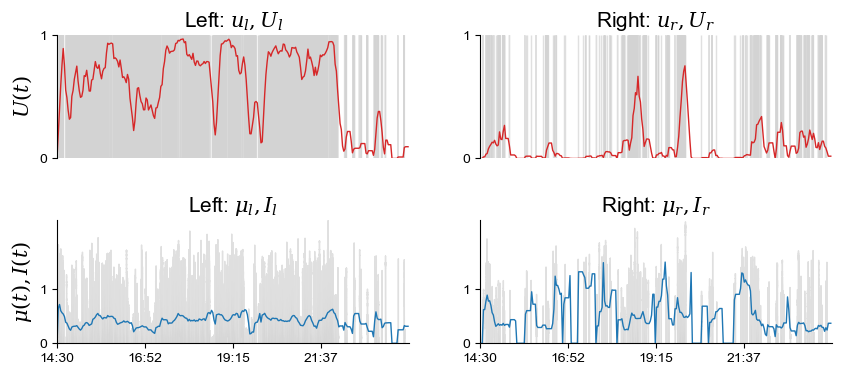

In [35]:
plt.figure(figsize=(10, 4))
a1 = plt.subplot(2, 2, 1)
plt.fill_between(l_t, 0, 1, where=l_use==1, color='lightgray', alpha=0.7)
plt.plot(l_tavuse, l_avuse, 'tab:red', linewidth=1)
plt.yticks([0, 1])
plt.ylim([0, 1])
plt.xlim([0, len(left)])
plt.ylabel("$U(t)$", fontsize=15)
plt.xticks([])
plt.title('Left: $u_l, U_l$', fontsize=15)
a1.spines[['right', 'top', 'bottom']].set_visible(False)

a2 = plt.subplot(2, 2, 2)
plt.fill_between(r_t, 0, 1, where=r_use==1, color='lightgray', alpha=0.7)
plt.plot(r_tavuse, r_avuse, 'tab:red', linewidth=1)
plt.yticks([0, 1])
plt.ylim([0, 1])
plt.xlim([0, len(right)])
plt.xticks([])
plt.title('Right: $u_r, U_r$', fontsize=15)
a2.spines[['right', 'top', 'bottom']].set_visible(False)


a3 =plt.subplot(2, 2, 3)
plt.fill_between(l_tint, 0, l_int, color='lightgray', alpha=0.7)
plt.plot(l_tavint, l_avint, 'tab:blue', linewidth=1)
plt.yticks([0, 1])
plt.xlim([0, len(left)])
plt.ylim([0, np.max((r_int, l_int))])
plt.ylabel("$\mu(t), I(t)$", fontsize=15)
plt.xticks(l_t[::int(len(left)/4)], left.index[::int(len(left)/4)].strftime('%H:%M'))
plt.title('Left: $\mu_l, I_l$', fontsize=15)
a3.spines[['right', 'top']].set_visible(False)

a4 = plt.subplot(2, 2, 4)
plt.fill_between(r_tint, 0, r_int, color='lightgray', alpha=0.7)
plt.plot(r_tavint, r_avint, 'tab:blue', linewidth=1)
plt.yticks([0, 1])
plt.ylim([0, np.max((r_int, l_int))])
plt.xlim([0, len(right)])
plt.xticks(r_t[::int(len(right)/4)], right.index[::int(len(right)/4)].strftime('%H:%M'))
plt.title('Right: $\mu_r, I_r$', fontsize=15)
a4.spines[['right', 'top']].set_visible(False)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Use vs. Intensity (UI) plot

In [46]:
windur = 60
winshift = 10

r_tavint, r_avint = ulfunc.ulint.average_intuse(intsig=r_int, usesig=r_use, windur=windur, winshift=winshift, fs=fs)
r_tavuse, r_avuse = ulfunc.uluse.average_uluse(usesig=r_use, windur=windur, winshift=winshift, fs=fs)

l_tavint, l_avint = ulfunc.ulint.average_intuse(intsig=l_int, usesig=l_use, windur=windur, winshift=winshift, fs=fs)
l_tavuse, l_avuse = ulfunc.uluse.average_uluse(usesig=l_use, windur=windur, winshift=winshift, fs=fs)

Text(0.5, 0, '$I$ (+ve: Right, -ve:Left)')

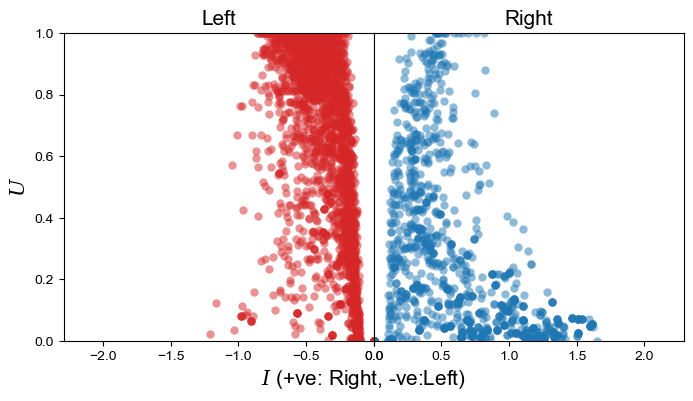

In [51]:
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(-l_avint, l_avuse, c='tab:red', alpha=0.5, linewidths=0)
plt.xlim([-np.max((r_int, l_int)), 0])
plt.ylim([0, 1])
plt.title('Left', fontsize=15)
plt.ylabel('$U$', fontsize=15)

plt.subplot(1, 2, 2)
plt.scatter(r_avint, r_avuse, alpha=0.5, linewidths=0)
plt.yticks([])
plt.xlim([0, np.max((r_int, l_int))])
plt.ylim([0, 1])
plt.title('Right', fontsize=15)

plt.subplots_adjust(wspace=0)
fig.text(0.5, 0, '$I$ (+ve: Right, -ve:Left)', ha='center', fontsize=15)

## Relative Use of the Upper-Limbs

### Bilateral Magnitude vs Magnitude Ratio (BMMR) plot

Text(0, 0.5, 'Bilateral Magnitude (BM)')

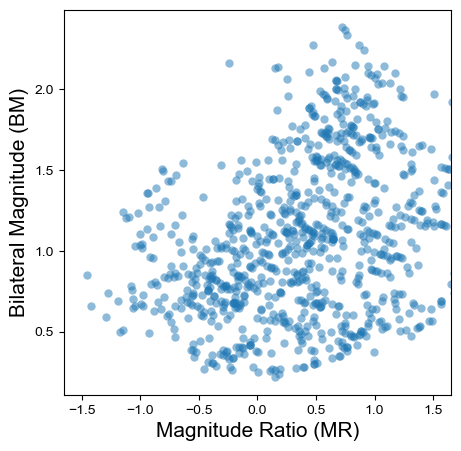

In [60]:
inx = (l_avint!=0) & (r_avint!=0)
mag_ratio = np.log(r_avint[inx]/l_avint[inx])
bilat_mag = r_avint[inx]+l_avint[inx]

plt.figure(figsize=(5, 5))
plt.scatter(mag_ratio, bilat_mag, alpha=0.5, linewidths=0)
plt.xlim([-np.max((r_avint, l_avint)), np.max((r_avint, l_avint))])
plt.xlabel('Magnitude Ratio (MR)', fontsize=15)
plt.ylabel('Bilateral Magnitude (BM)', fontsize=15)


### Left Intensity vs. Right Intensity (LIRI) plot

(0.0, 1.6532622943181774)

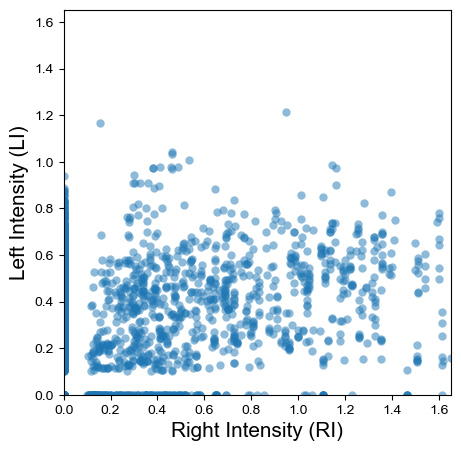

In [61]:
plt.figure(figsize=(5, 5))
plt.scatter(r_avint, l_avint, alpha=0.5, linewidths=0)
plt.xlabel('Right Intensity (RI)', fontsize=15)
plt.ylabel('Left Intensity (LI)', fontsize=15)
plt.xlim([0, np.max((r_avint, l_avint))])
plt.ylim([0, np.max((r_avint, l_avint))])

### Intensity Sum vs. Intensity Difference (ISID) plot

Text(0, 0.5, 'Intensity Sum (IS)')

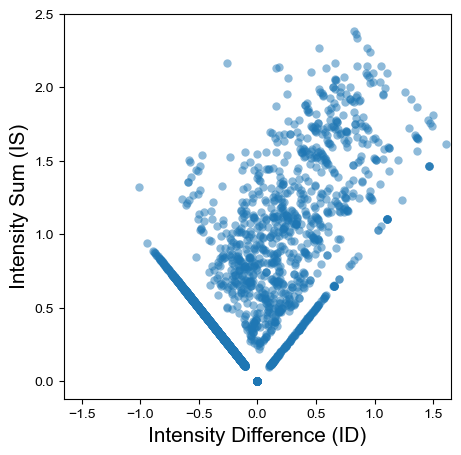

In [62]:
idiff = r_avint - l_avint
isum = r_avint + l_avint

plt.figure(figsize=(5, 5))
plt.scatter(idiff, isum, alpha=0.5, linewidths=0)
plt.xlim([-np.max((r_avint, l_avint)), np.max((r_avint, l_avint))])
plt.xlabel('Intensity Difference (ID)', fontsize=15)
plt.ylabel('Intensity Sum (IS)', fontsize=15)